In [1]:
import numpy as np


# a * x ^ n + b * x ^ (n - 1) ... + z
def polynomial(a):
    return 2 * a ** 2 + 5 * a - 3


def foo_first_derivative(a):
    return 2 * a + 5


def foo_second_derivative(a):
    return 2 * a + 5


def foo_third_derivative(x):
    return 2


def foo_fourth_derivative(x):
    return 0


def exponential(x):
    return np.exp(x)


In [2]:
derivatives = {
    "polynomial":
    {
        0: polynomial,
        1: foo_first_derivative,
        2: foo_second_derivative,
        3: foo_third_derivative,
        **{k: foo_fourth_derivative for k in range(4, 10 + 1)}
    },
    "exponential":
    {
        k: exponential for k in range(10 + 1)
    }
}


In [3]:
# Rozwinięcie wokół "a", a potem jak już dostaniemy wielomian, który nam będzie aproxymował funkcję to możemy podstawić dla ktorej obliczana będzie wartosc funkcji w docelowym punkcie 

In [4]:
import math


# f(a) + f(a)' / 1! (x - a) + f(a)'' / 2! (x - a) ** 2 + f(a)''' / 3! (x - a) ** 3 ...
def taylor_component(f_name, x, a, n):
    return derivatives[f_name][n](a) / math.factorial(n) * (x - a) ** n



In [5]:
def taylor_series(f_name, x: float, a_point_around, n_approx: int = 3):
    res = 0
    for n in range(n_approx):
        res += taylor_component(f_name, x, a_point_around, n)
    return res

In [25]:
def appends(d, f, x, n, a_point_around, formula, offset=1):
    d["value_taylor"].append(taylor_series(f.__name__, x, a_point_around, n_approx=n))
    d["value_true"].append(f(x))
    d["x"].append(x)
    x_vec_true = np.linspace(-(max(x, a_point_around) + offset), max(x, a_point_around) + offset)
    d["x_vec_true"].append(x_vec_true)
    d["value_vec_true"].append(f(x_vec_true))
    d["value_vec_taylor"].append([taylor_series(f.__name__, x_val, a_point_around, n_approx=n) for x_val in x_vec_true])
    d["a_point_around"].append(a_point_around)
    d["a_point_around_value"].append(f(a_point_around))
    d["n"].append(n)
    d["fun"].append(f.__name__)
    d["formula"].append(formula)

In [26]:
from collections import defaultdict
import pandas as pd
import seaborn as sns


d = defaultdict(list)
for f, formula in zip((polynomial, exponential), ("2a^2+5a-3", "e^x")):
    num = 5
    for x in np.linspace(0, 10, num=num):
        for a_point_around in np.linspace(0, 10, num=num):
            for n in range(0, 10 + 1):
                if n < 10:
                    appends(d, f, x, n, a_point_around, formula)
                else:
                    appends(d, f, x, n, a_point_around, formula, offset=3)
    df = pd.DataFrame.from_dict(d)
    df["error"] = df["value_taylor"] - df["value_true"]
    df["x_minus_a_point_around"] = df["x"] - df["a_point_around"]

In [103]:
def plot_comparison(df_0, x_span=None):
    sns.lineplot(data=df_0, x="x_vec_true", y="value_vec_taylor", label="taylor")
    sns.lineplot(data=df_0, x="x_vec_true", y="value_vec_true", label="true function")
    sns.scatterplot(x=[df_0.x], y=[df_0.value_taylor], marker='+', s=100, label="value_taylor")
    sns.scatterplot(x=[df_0.x], y=[df_0.value_true], marker='X', s=100, label="value_true")
    sns.scatterplot(x=[df_0.a_point_around], y=[df_0.a_point_around_value], marker='o', s=100, label="a_point_around")
    plt.title(f"{df_0.fun}_{df_0.n=}_{df_0.x=}_{df_0.a_point_around=}\n{df_0.formula}{df_0.error=}")
    if x_span:
        plt.xlim(x_span)
    plt.show()

In [104]:
def get_df_0(df, f_name, criterion="error", a_point_around=None, n=None, x=None):
    if criterion.lower() == "error":
        mask = (df.fun == f_name) & (df["x_minus_a_point_around"] != 0)
        s_idx = abs(
            df.loc[mask].error
        ).sort_values(ascending=True).index
        df_0 = df.loc[
            mask & (df.index == s_idx[0])
        ].iloc[0]
    else:
        if a_point_around not in df.a_point_around.unique() or x not in df.x.unique() or n not in df.n.unique():
            raise Exception(f"{a_point_around=}{df.a_point_around.unique()=}{x=}{df.x.unique()=}{n=}{df.n.unique()=}")
        mask = (df.fun == f_name) & (df["a_point_around"] == a_point_around) \
            & (df.n == n) & (df.x == x)
        df_0 = df.loc[
            mask
        ].iloc[0]
    return df_0

value_taylor                                                           -3.0
value_true                                                             -3.0
x                                                                       0.0
x_vec_true                [-8.5, -8.153061224489797, -7.8061224489795915...
value_vec_true            [99.0, 89.17950853810916, 79.84048313202831, 7...
value_vec_taylor          [-173.0, -166.0612244897959, -159.122448979591...
a_point_around                                                          7.5
a_point_around_value                                                  147.0
n                                                                         2
fun                                                              polynomial
formula                                                           2a^2+5a-3
error                                                                   0.0
x_minus_a_point_around                                                 -7.5
Name: 35, dt

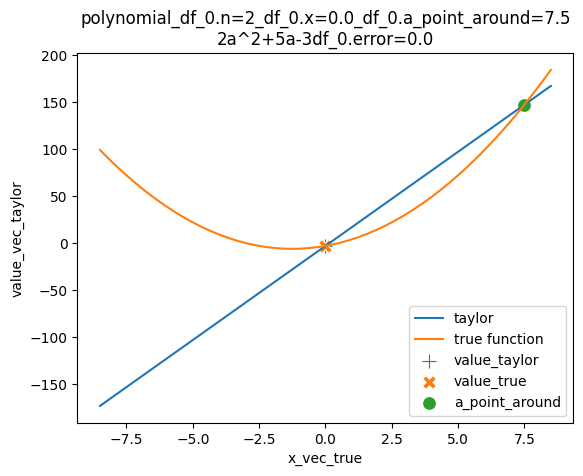

value_taylor                                                      12.179115
value_true                                                        12.182494
x                                                                       2.5
x_vec_true                [-5.5, -5.275510204081633, -5.051020408163265,...
value_vec_true            [0.004086771438464067, 0.005115346171880261, 0...
value_vec_taylor          [-4.6024511858689525, -3.0751596914374293, -2....
a_point_around                                                          0.0
a_point_around_value                                                    1.0
n                                                                        10
fun                                                             exponential
formula                                                                 e^x
error                                                             -0.003379
x_minus_a_point_around                                                  2.5
Name: 340, d

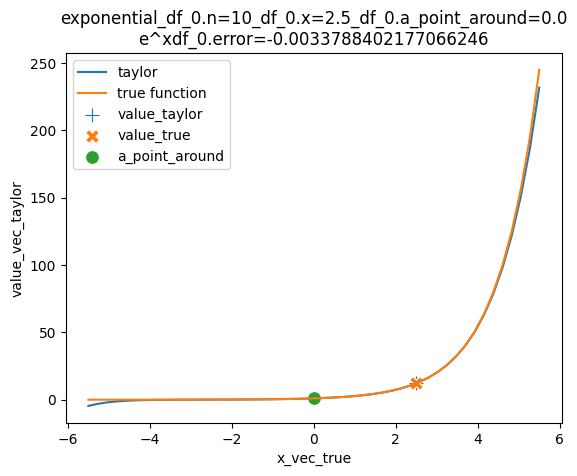

In [105]:
from matplotlib import pyplot as plt


for f_name in ("polynomial", "exponential"):
    df_0 = get_df_0(df, f_name)
    display(df_0)
    plot_comparison(df_0)

value_taylor                                                      25.782277
value_true                                                        12.182494
x                                                                       2.5
x_vec_true                [-6.0, -5.755102040816326, -5.510204081632653,...
value_vec_true            [0.0024787521766663585, 0.003166583473812997, ...
value_vec_taylor          [231096.80972066137, 200153.7215976608, 172757...
a_point_around                                                          5.0
a_point_around_value                                             148.413159
n                                                                         7
fun                                                             exponential
formula                                                                 e^x
error                                                             13.599783
x_minus_a_point_around                                                 -2.5
Name: 359, d

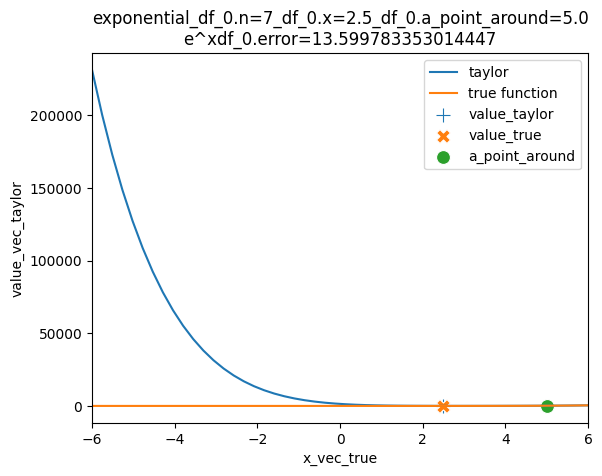

In [108]:
df_0 = get_df_0(df, "exponential", criterion="other", a_point_around=5, n=7, x=2.5)
display(df_0)
plot_comparison(df_0, x_span=[-6, 6])

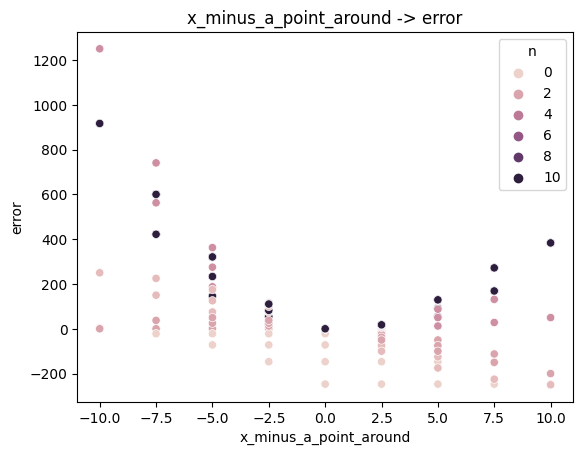

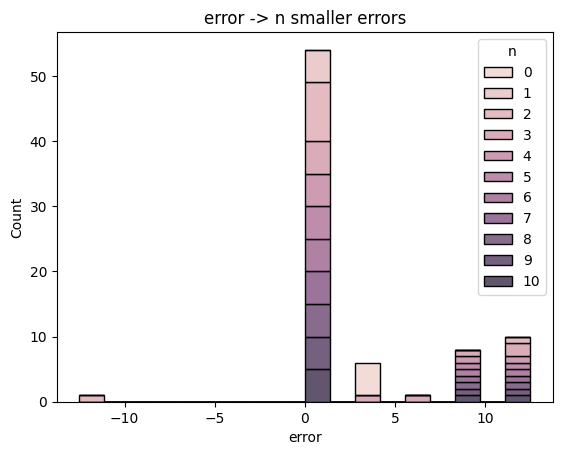

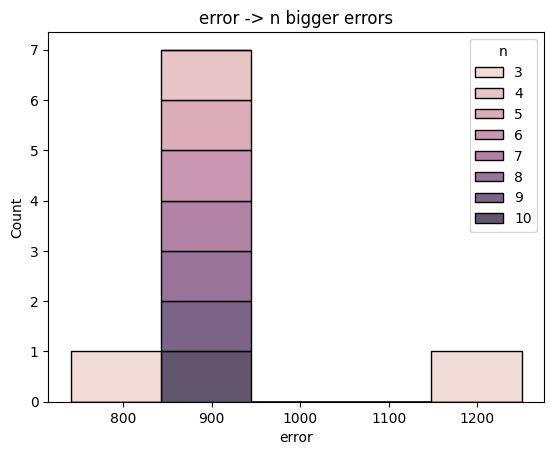

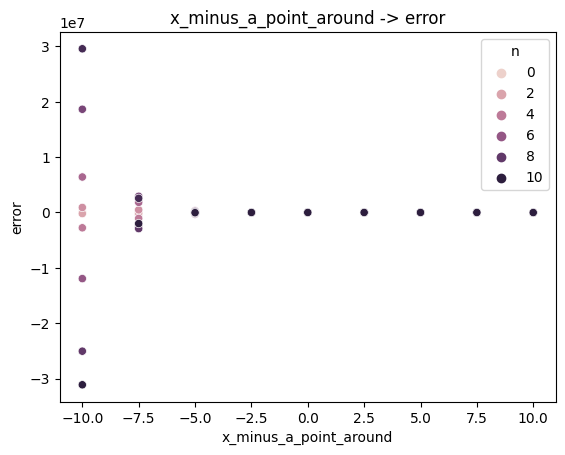

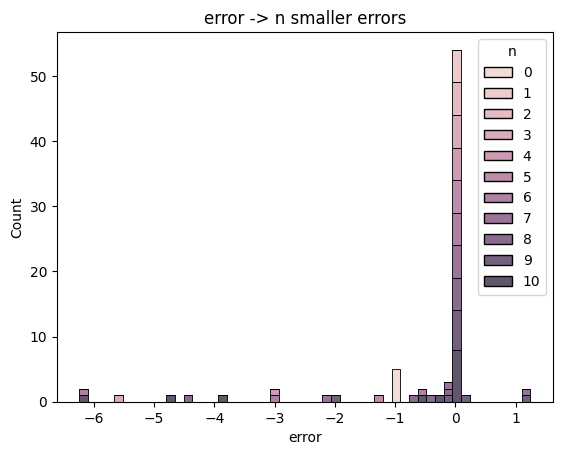

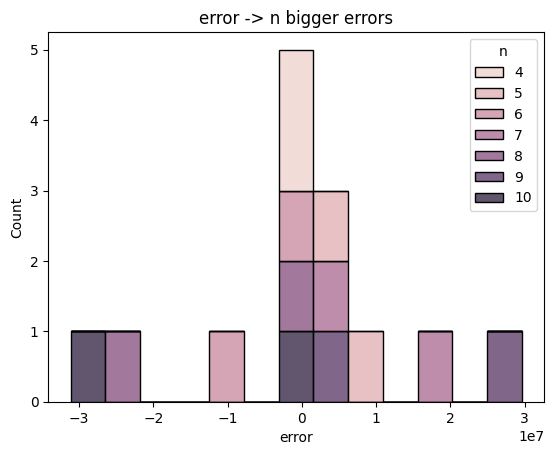

In [34]:
for f_name in ("polynomial", "exponential"):
    df_tmp = df.loc[df.fun == f_name]

    sns.scatterplot(data=df_tmp, x="x_minus_a_point_around", y="error", hue="n")
    plt.title("x_minus_a_point_around -> error")
    plt.show()

    sns.histplot(
        data=df_tmp.loc[
            (abs(df_tmp["error"]) < abs(df_tmp.error.median() / 2))
        ],
        x="error",
        hue="n",
        multiple="stack"
    )
    plt.title("error -> n smaller errors")
    plt.show()

    q = abs(df_tmp.error).quantile(0.95)
    sns.histplot(
        data=df_tmp.loc[
            abs(df_tmp["error"]) > q
        ],
        x="error",
        hue="n",
        multiple="stack"
    )
    plt.title("error -> n bigger errors")
    plt.show()

    # sns.histplot(data=df.iloc[:10], x="error", hue="x_minus_a_point_around")
    # plt.show()